# **Import and View File**

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [ ]:
#upload file
df = pd.read_excel('/content/Online Retail.xlsx')


In [ ]:
#row count
row_count = df.shape[0]
print(f"Number of rows: {row_count}")

Number of rows: 541909


In [ ]:
#first few rows
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
#Check Datatype
df.dtypes


,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


# **Clean Dataset**

In [ ]:
#check for duplicates
df.shape
duplicate_rows_df = df[df.duplicated()]
print(duplicates.sort_values(list(df.columns)))
print("number of duplicate rows: ", duplicate_rows_df.shape)

       InvoiceNo StockCode                          Description  Quantity  \
494       536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
485       536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
539       536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866        HAND WARMER SCOTTY DOG DESIGN         1   
...          ...       ...                                  ...       ...   
440149   C574510     22360      GLASS JAR ENGLISH CONFECTIONERY        -1   
461407   C575940     23309  SET OF 60 I LOVE LONDON CAKE CASES        -24   
461408   C575940     23309  SET OF 60 I LOVE LONDON CAKE CASES        -24   
529980   C580764     22667                RECIPE BOX RETROSPOT        -12   
529981   C580764     22667                RECIPE BOX RETROSPOT        -12   

               InvoiceDate  UnitPrice  CustomerID         Country  
494    

In [ ]:
#drop duplicates
df = df.drop_duplicates()
df.count()


,0
InvoiceNo,536640
StockCode,536640
Description,535186
Quantity,536640
UnitPrice,536640
CustomerID,401603
Country,536640


In [ ]:
#check for nulls
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


Description and CustomerID nulls will not affect the analysis, will not drop the rows.

In [ ]:
#recheck row count after cleaning
row_count = df.shape[0]
print(f"Number of rows: {row_count}")

Number of rows: 536640


In [ ]:
# Convert to datetime and sort
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.sort_values('InvoiceDate')

# Set Date as index (for time-based operations)
df.set_index('InvoiceDate', inplace=True)

# **Descriptive Statistics**

In [ ]:
#Unit Price and Quantity Stats

# Select numeric columns and drop 'CustomerID'
numeric_df = df.select_dtypes(include='number').drop(columns=['CustomerID'])

#Descriptive Statistics
print("Descriptive Statistics:\n")
print(tabulate(numeric_df.describe().T, headers='keys', tablefmt='pretty'))

# Central tendency
mean = numeric_df.mean()
median = numeric_df.median()
mode = numeric_df.mode().iloc[0]  # Take the first mode if multiple

# Dispersion
data_range = numeric_df.max() - numeric_df.min()
variance = numeric_df.var()
standard_deviation = numeric_df.std()
iqr = numeric_df.quantile(0.75) - numeric_df.quantile(0.25)


stats_df = pd.DataFrame({
    'Median': median,
    'Mode': mode,
    'Range': data_range,
    'Variance': variance,
    'Std Dev': standard_deviation,
    'IQR': iqr
})

print("\nSummary Statistics:\n")
print(tabulate(stats_df, headers='keys', tablefmt='pretty', floatfmt=".2f"))


Descriptive Statistics:

+-----------+----------+-------------------+--------------------+-----------+------+------+------+---------+
|           |  count   |       mean        |        std         |    min    | 25%  | 50%  | 75%  |   max   |
+-----------+----------+-------------------+--------------------+-----------+------+------+------+---------+
| Quantity  | 536641.0 | 9.620029032444409 | 219.13015613097335 | -80995.0  | 1.0  | 3.0  | 10.0 | 80995.0 |
| UnitPrice | 536641.0 | 4.632655674836622 | 97.23311763773249  | -11062.06 | 1.25 | 2.08 | 4.13 | 38970.0 |
+-----------+----------+-------------------+--------------------+-----------+------+------+------+---------+

Summary Statistics:

+-----------+--------+------+----------+-------------------+--------------------+------+
|           | Median | Mode |  Range   |     Variance      |      Std Dev       | IQR  |
+-----------+--------+------+----------+-------------------+--------------------+------+
| Quantity  |  3.0   | 1.0  | 16

## **Product Analysis: Quantity and Sales**

Top 10 Products by Quantity Sold:
                       Description  TotalQuantity
 WORLD WAR 2 GLIDERS ASSTD DESIGNS          53751
           JUMBO BAG RED RETROSPOT          47260
                    POPCORN HOLDER          36322
     ASSORTED COLOUR BIRD ORNAMENT          36282
   PACK OF 72 RETROSPOT CAKE CASES          36016
WHITE HANGING HEART T-LIGHT HOLDER          35006
                RABBIT NIGHT LIGHT          30631
           MINI PAINT SET VINTAGE           26437
        PACK OF 12 LONDON TISSUES           26299
PACK OF 60 PINK PAISLEY CAKE CASES          24719

Top 10 Products by Sales:
                       Description  TotalSales
                    DOTCOM POSTAGE   206245.48
          REGENCY CAKESTAND 3 TIER   164459.49
                     PARTY BUNTING    98243.88
WHITE HANGING HEART T-LIGHT HOLDER    97659.94
           JUMBO BAG RED RETROSPOT    92175.79
                RABBIT NIGHT LIGHT    66661.63
                           POSTAGE    66230.64
   PAPER CHAI

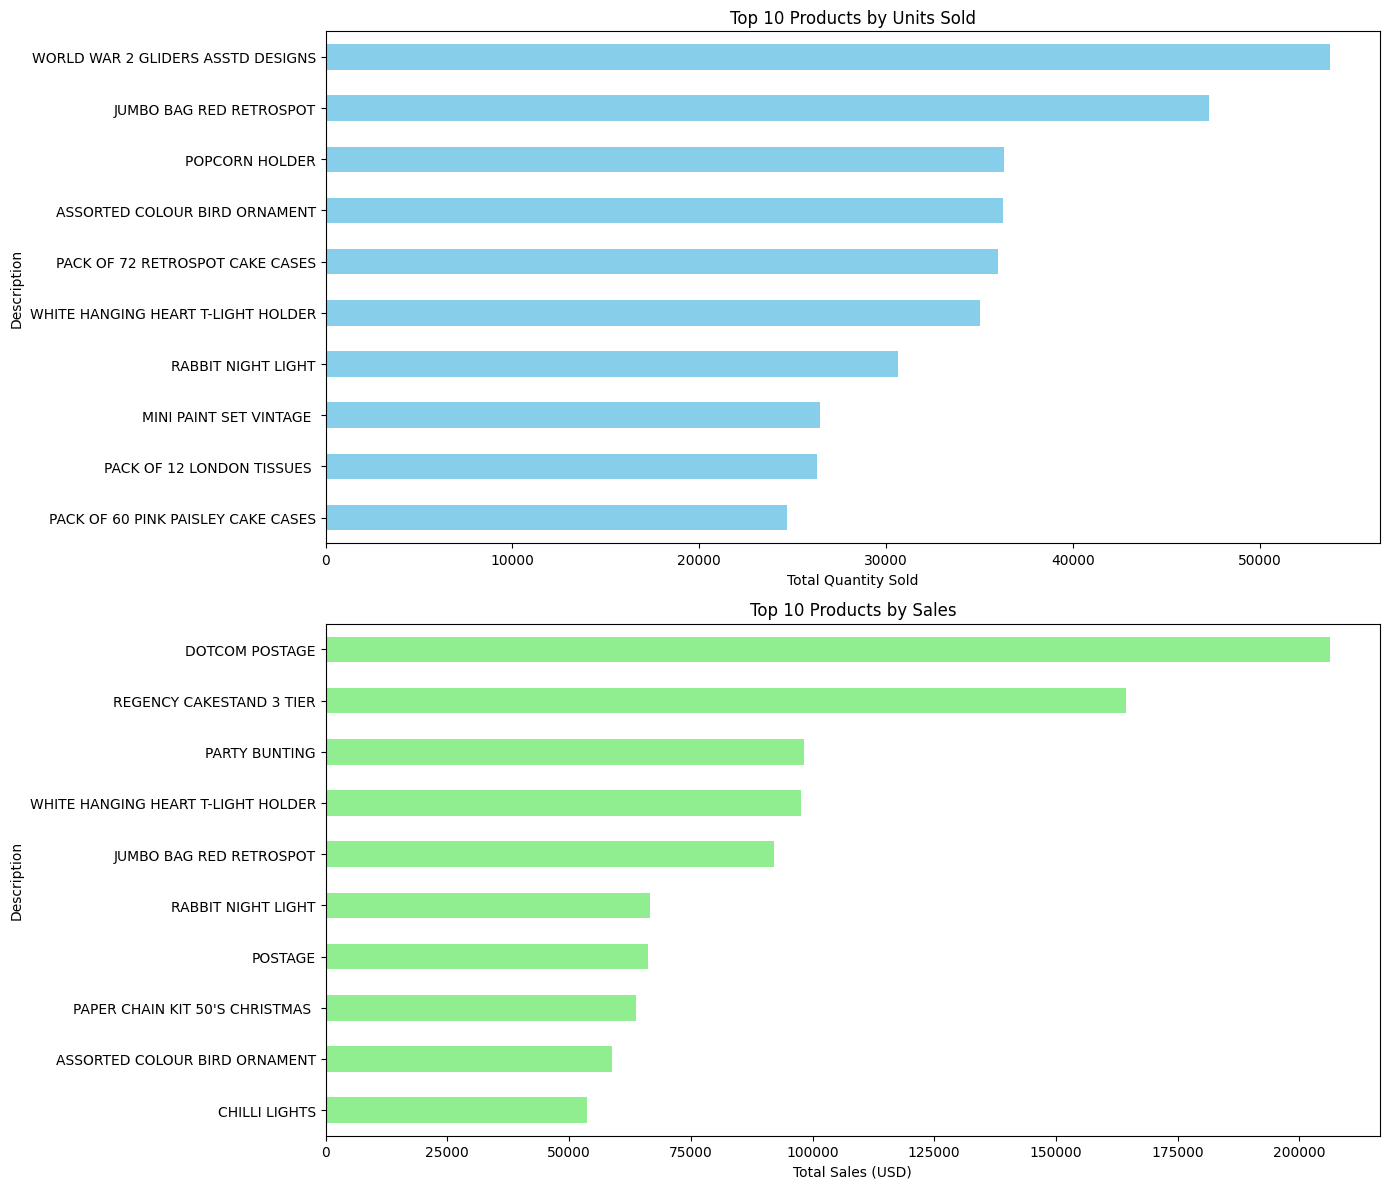


Key Statistics:
Total Products: 4,792
Average Quantity per Product: 1080.2
Average Sales per Product: $2,029.63


In [ ]:
# Top 10 best-selling items by quantity and sales

# Calculate total revenue per transaction line
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by product and aggregate metrics
product_analysis = df.groupby(['StockCode', 'Description']).agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalSales=('TotalSales', 'sum')
).reset_index()

# Top 10 by Quantity Sold
top10_quantity = product_analysis.nlargest(10, 'TotalQuantity')[['Description', 'TotalQuantity']]
print("Top 10 Products by Quantity Sold:")
print(top10_quantity.to_string(index=False))

# Top 10 by Revenue Generated
top10_sales = product_analysis.nlargest(10, 'TotalSales')[['Description', 'TotalSales']]
print("\nTop 10 Products by Sales:")
print(top10_sales.to_string(index=False))

# Combined Analysis (Products in Both Top 10s)
combined_top = product_analysis[
    product_analysis['Description'].isin(top10_quantity['Description']) &
    product_analysis['Description'].isin(top10_sales['Description'])
]
print("\nProducts Appearing in Both Top 10 Lists:")
print(combined_top[['Description', 'TotalQuantity', 'TotalSales']].to_string(index=False))


fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Quantity Chart
top10_quantity.plot(kind='barh', y='TotalQuantity', x='Description',
                    ax=ax[0], title='Top 10 Products by Units Sold',
                    legend=False, color='skyblue')
ax[0].set_xlabel('Total Quantity Sold')
ax[0].invert_yaxis()

#Sales Chart
top10_sales.plot(kind='barh', y='TotalSales', x='Description',
                   ax=ax[1], title='Top 10 Products by Sales',
                   legend=False, color='lightgreen')
ax[1].set_xlabel('Total Sales (USD)')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Additional
print("\nKey Statistics:")
print(f"Total Products: {len(product_analysis):,}")
print(f"Average Quantity per Product: {product_analysis['TotalQuantity'].mean():.1f}")
print(f"Average Sales per Product: ${product_analysis['TotalSales'].mean():,.2f}")


In [ ]:
# Check for negative quantities/prices- Total returned items
print("\nData Quality Checks:")
print("Negative Quantities:", df[df['Quantity'] < 0].shape[0])
print("Zero/Null Prices:", df[(df['UnitPrice'] <= 0) | df['UnitPrice'].isnull()].shape[0])



Data Quality Checks:
Negative Quantities: 10587
Zero/Null Prices: 2512


# **Country Analysis**

In [ ]:
# List and number of countries in dataset
unique_countries = df['Country'].unique()
print("List of unique countries:")
print(unique_countries)
print(f"Number of unique countries in the dataset: {unique_countries.shape[0]}")

List of unique countries:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
Number of unique countries in the dataset: 38


In [ ]:
# Calculate revenue and total quantity
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Agg country stats
country_stats = df.groupby('Country').agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalSales=('Sales', 'sum')
).reset_index().sort_values('TotalQuantity', ascending=False)

# Add percentage contribution
total_sales = country_stats['TotalSales'].sum()
country_stats['Sale %'] = (country_stats['TotalSales'] / total_sales * 100).round(1)


print("\nTop Countries by Quantity Sold with Sales and Percentage Contributions:")
print(tabulate(
    country_stats.head(10)[['Country', 'TotalQuantity', 'TotalSales', 'Sale %']],
    headers=['Country', 'Quantity','Sales', 'Sale %'],
    tablefmt='pretty',
    numalign="right",
    floatfmt=(",.0f", ".1f", ",.0f", ".1f"),
    showindex=False
))


Top Countries by Quantity Sold with Sales and Percentage Contributions:
+----------------+----------+-------------+--------+
|    Country     | Quantity |    Sales    | Sale % |
+----------------+----------+-------------+--------+
| United Kingdom | 4250326  | 8167124.284 |  84.0  |
|  Netherlands   |  200128  |  284661.54  |  2.9   |
|      EIRE      |  142495  |  262993.38  |  2.7   |
|    Germany     |  117341  |  221509.47  |  2.3   |
|     France     |  110438  |  197317.11  |  2.0   |
|   Australia    |  83643   |  137009.77  |  1.4   |
|     Sweden     |  35632   |  36585.41   |  0.4   |
|  Switzerland   |  30313   |  56363.05   |  0.6   |
|     Spain      |  26817   |  54756.03   |  0.6   |
|     Japan      |  25218   |  35340.62   |  0.4   |
+----------------+----------+-------------+--------+


In [ ]:
# Top product per country

# Group data by Country and Product
country_products = df.groupby(['Country', 'Description']).agg(
    CountryQuantity=('Quantity', 'sum'),
    CountrySales=('Sales', 'sum')
).reset_index()

# Top products
all_products = []
for country in country_products['Country'].unique():
    top_product = country_products[country_products['Country'] == country] \
        .nlargest(1, 'CountryQuantity') \
        [['Country', 'Description', 'CountryQuantity', 'CountrySales']]
    all_products.append(top_product)

# Combine number entries starting at 1
combined = pd.concat(all_products).reset_index(drop=True)
combined.insert(0, '#', range(1, len(combined)+1))

print("\nTop Product per Country (Numbered):")
print(tabulate(
    combined,
    headers=['#', 'Country', 'Product', 'Units Sold', 'Sales'],
    tablefmt='pretty',
    numalign="right",
    floatfmt=",.2f",
    showindex=False
))


Top Product per Country (Numbered):
+----+----------------------+-------------------------------------+------------+--------------------+
| #  |       Country        |               Product               | Units Sold |       Sales        |
+----+----------------------+-------------------------------------+------------+--------------------+
| 1  |      Australia       |       MINI PAINT SET VINTAGE        |    2916    |       1607.4       |
| 2  |       Austria        |  SET 12 KIDS COLOUR  CHALK STICKS   |    288     | 103.67999999999999 |
| 3  |       Bahrain        |     ICE CREAM SUNDAE LIP GLOSS      |     96     |       120.0        |
| 4  |       Belgium        |   PACK OF 72 RETROSPOT CAKE CASES   |    480     |       248.4        |
| 5  |        Brazil        |        DOLLY GIRL LUNCH BOX         |     24     |        46.8        |
| 6  |        Canada        |     RETRO COFFEE MUGS ASSORTED      |    504     |       534.24       |
| 7  |   Channel Islands    |             RAI

In [ ]:
# Returned items (negative quantities)
returns = df[df['Quantity'] < 0].groupby('Description')['Quantity'].sum()

print("\nMost Frequently Returned Products:")
print(returns.nsmallest(5).to_string())


Most Frequently Returned Products:
Description
PAPER CRAFT , LITTLE BIRDIE      -80995
MEDIUM CERAMIC TOP STORAGE JAR   -74494
printing smudges/thrown away     -19200
Unsaleable, destroyed.           -15644
check                            -13247


# **DateTime Analysis**

Most busy weekday by transaction count: Thursday

Busiest Day: Monday (2011-12-05)
Busiest Hour: 12:00 - 13:00

Daily Performance Analysis:
           Transactions   Quantity      Revenue
DayOfWeek                                      
Monday          94435.0   813178.0  1584895.301
Tuesday        101064.0   961133.0  1965703.611
Wednesday       93715.0   967222.0  1730088.430
Thursday       103056.0  1165600.0  2108701.530
Friday          81565.0   793106.0  1537958.621
Saturday            NaN        NaN          NaN
Sunday          62805.0   462261.0   798655.561

Hourly Performance Analysis:
      Transactions  Quantity      Revenue
Hour                                     
6               41       -86     -497.350
7              383     15361    31009.320
8             8906    157715   281723.020
9            34314    429254   766524.171
10           48808    683519  1327329.891
11           56949    635974  1146457.490
12           77573    821059  1357595.120
13           71247  

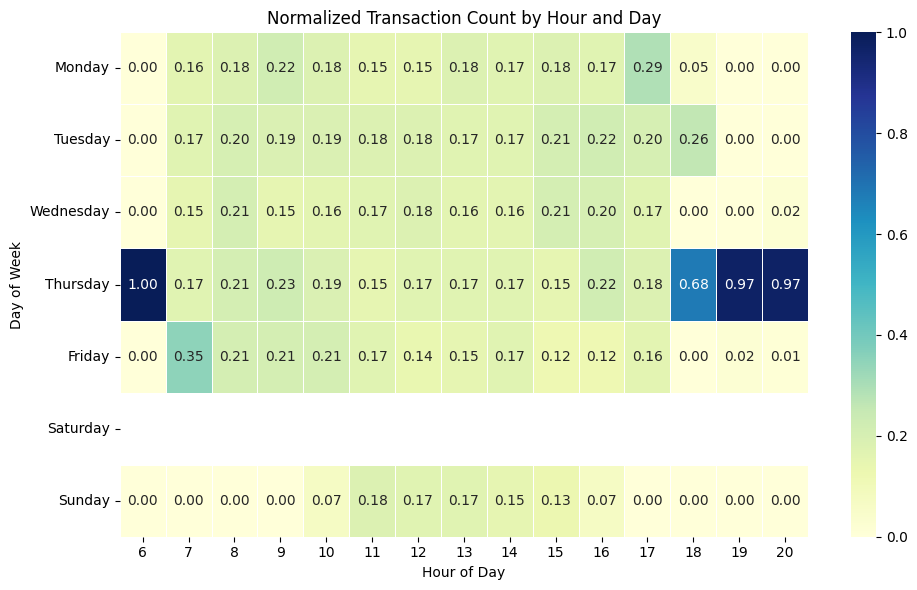

In [ ]:
# Best performing Days and Times

# Daily transactions
daily_transactions = df.groupby('Date').size()
daily_transactions.index = pd.to_datetime(daily_transactions.index)

# DataFrame to track weekday
daily_df = daily_transactions.reset_index()
daily_df.columns = ['Date', 'TransactionCount']
daily_df['Weekday'] = daily_df['Date'].dt.day_name()

# Sum of transactions
total_transactions_by_weekday = daily_df.groupby('Weekday')['TransactionCount'].sum()

# Reorder
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_transactions_by_weekday = total_transactions_by_weekday.reindex(weekday_order)

# Total
most_busy_weekday = total_transactions_by_weekday.idxmax()


# Print results
print(f"\nBusiest Day: {busiest_day_of_week} ({busiest_day_date})")
print(f"Busiest Hour: {busiest_hour}:00 - {busiest_hour+1}:00")

print(f"Most busy weekday by transaction count: {most_busy_weekday}")

print("\nDaily Performance Analysis:")
print(dow_analysis.to_string())

print("\nHourly Performance Analysis:")
print(hourly_analysis.to_string())

# Crosstab heatmap data
heatmap_data = pd.crosstab(df['DayOfWeek'], df['Hour'], normalize='columns').round(2)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(weekday_order)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5, fmt=".2f")
plt.title("Normalized Transaction Count by Hour and Day")
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()

In [ ]:
#Step 2: Busiest Days by Quantity & Sales
# Daily totals
daily_quantity = df['Quantity'].resample('D').sum()
daily_sales = df['Sales'].resample('D').sum()

# Top 5 busiest days
top_days_quantity = daily_quantity.nlargest(5)
top_days_sales = daily_sales.nlargest(5)

print("Top 5 Days by Quantity Sold:")
print(top_days_quantity.to_string())

print("\nTop 5 Days by sales:")
print(top_days_sales.to_string())

Top 5 Days by Quantity Sold:
InvoiceDate
2011-10-05    46097
2011-11-14    45842
2011-12-05    44038
2011-09-20    43659
2011-10-20    40738

Top 5 Days by sales:
InvoiceDate
2011-11-14    111958.62
2011-09-20    109228.08
2011-12-08     81294.33
2011-11-23     78223.52
2011-10-05     75111.57


In [60]:
# Busiest weeks
Weekly_Quantity = df['Quantity'].resample('W').sum()
Weekly_Sales = df['Sales'].resample('W').sum()

# Combine both metrics
top_weeks = pd.DataFrame({
    'Quantity': Weekly_Quantity,
    'Sales': Weekly_Sales
}).nlargest(5, 'Quantity')

# Format dates
top_weeks.index = top_weeks.index.strftime('%Y-%m-%d')

print("\nTop 5 Weeks by Quantity Sold with Sales:")
print(top_weeks.to_string())





Top 5 Weeks by Quantity Sold with Sales:
             Quantity       Sales
InvoiceDate                      
2011-11-20     178349  378849.780
2011-11-13     176360  345524.690
2011-09-25     164829  325679.011
2011-11-27     161836  306886.920
2011-12-11     159810  300098.440


END

In [ ]:
#export cleaned dataset
from google.colab import files
df.to_csv('Online_Retail_Clean.csv', encoding = 'utf-8-sig')
files.download('Online_Retail_Clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save top products to Excel
with pd.ExcelWriter('product_analysis.xlsx') as writer:
    top10_quantity.to_excel(writer, sheet_name='Top Quantity', index=False)
    top10_sales.to_excel(writer, sheet_name='Top sale', index=False)
    combined_top.to_excel(writer, sheet_name='Top Combined', index=False)


In [ ]:
# Export for Tableau
df.to_csv('cleaned_retail_data.csv', index=False)
top_product.to_csv('top_products.csv', index=False)
country_stats.to_csv('country_stats.csv', index=False)